In [53]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
weather_data = pd.read_csv("weather.csv")
weather_data
Incidence_data=pd.read_csv("_cleaned_incidence_rate.csv")
Incidence_data

Incidence_data1=Incidence_data.groupby(['cause_name']).mean()
#Incidence_data.reset_index(inplace=True)
Incidence_data1
total=Incidence_data1['val'].sum()
total

#Incidence_data['Percentage']=Incidence_data['val']/total
#Incidence_data

#Incidence_data = Incidence_data.sort_values(["Percentage"], ascending=False).head(5)
#Incidence_data.head()
#Incidence_data=Incidence_data.style.format({'Percentage': '{:,.2%}'.format})
#Incidence_data


19695.099502636705

([<matplotlib.patches.Wedge at 0x11d59be80>,
 [Text(-0.6940682111213534, -0.9789123139029382, 'Mental'),
  Text(1.000207190464424, -0.4578051726916848, 'Depressive'),
  Text(0.4712447601063409, 0.9939458617411299, 'Major depressive'),
  Text(-0.525048070749816, 0.9666046365510029, 'Substance use'),
  Text(-0.8206801259785934, 0.7324507702390382, 'Alcohol use'),
  Text(-1.0554152944555624, 0.3099976713287998, 'Other')],
 [Text(-0.4048731231541228, -0.5710321831100472, '30.4%'),
  Text(0.5455675584351404, -0.2497119123772826, '25.6%'),
  Text(0.25704259642164046, 0.5421522882224344, '24.0%'),
  Text(-0.28638985677262685, 0.5272388926641833, '6.0%'),
  Text(-0.44764370507923273, 0.3995186019485662, '5.0%'),
  Text(-0.575681069703034, 0.16908963890661807, '9.1%')])

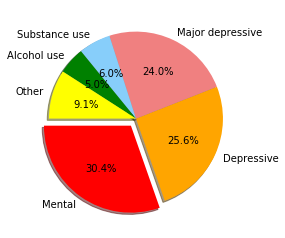

In [55]:
# Labels for the sections of our pie chart
labels = ["Mental", "Depressive", "Major depressive", "Substance use","Alcohol use","Other"]

# The values of each section of the pie chart
sizes = [5981, 5042, 4721, 1174,986,1791]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","green","yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

In [84]:
Incidence_data2=Incidence_data.groupby(['location_name','cause_name']).mean()
Incidence_data2.reset_index(inplace=True)
Incidence_data2
Incidence_data2.columns
Incidence_data2.cause_name.unique()
Incidence_data_list=['Depressive disorders','Major depressive disorder']
Incidence_sv=Incidence_data2[Incidence_data2.cause_name.isin(Incidence_data_list)]
Incidence_sv
Incidence_data3=Incidence_sv.groupby(['location_name']).sum()
Incidence_data3
Incidence_data3.reset_index(inplace=True)
Incidence_data4=Incidence_data3.rename(columns={'location_name': 'State','val':'Incidence rate'})
Incidence_data4.head()


,State,Incidence rate
0,Alabama,9508.697294
1,Alaska,10224.413974
2,Arizona,10676.909849
3,Arkansas,11135.754906
4,California,8597.080415


In [85]:
rainfall_depression_data=pd.merge(weather_data,Incidence_data4,on='State')
rainfall_depression_data.head()

,State,Inches,metres,Rank,Incidence rate
0,Alabama,58.3,1480,4,9508.697294
1,Alaska,22.5,572,39,10224.413974
2,Arizona,13.6,345,47,10676.909849
3,Arkansas,50.6,1284,8,11135.754906
4,California,22.2,563,40,8597.080415


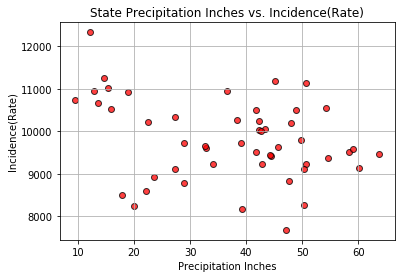

In [88]:
plt.scatter(rainfall_depression_data["Inches"], rainfall_depression_data["Incidence rate"], marker="o",facecolors="red", edgecolors="black",
         alpha=0.75)

plt.title("State Precipitation Inches vs. Incidence(Rate)")
plt.ylabel("Incidence(Rate)")
plt.xlabel("Precipitation Inches")
plt.grid(True)

#len(Incidence_data["Incidence (Rate)"]) == len(weather_data["Inches"])
